In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv('data/3-agents-no-self-votes-sticky-100/1/progress.csv')
ROLLING_FRAME = 5

In [30]:
df.columns

Index(['Unnamed: 0', 'episode_reward_max', 'episode_reward_min',
       'episode_reward_mean', 'episode_len_mean', 'episodes_this_iter',
       'num_healthy_workers', 'timesteps_total', 'done', 'episodes_total',
       'training_iteration', 'experiment_id', 'date', 'timestamp',
       'time_this_iter_s', 'time_total_s', 'pid', 'time_since_restore',
       'timesteps_since_restore', 'iterations_since_restore', 'trial_id',
       'policy_reward_min/traitor', 'policy_reward_min/innocent',
       'policy_reward_max/traitor', 'policy_reward_max/innocent',
       'policy_reward_mean/traitor', 'policy_reward_mean/innocent',
       'custom_metrics/reward_innocents_mean',
       'custom_metrics/reward_innocents_min',
       'custom_metrics/reward_innocents_max',
       'custom_metrics/reward_traitors_mean',
       'custom_metrics/reward_traitors_min',
       'custom_metrics/reward_traitors_max',
       'custom_metrics/coins_collected_mean',
       'custom_metrics/coins_collected_min',
       'c

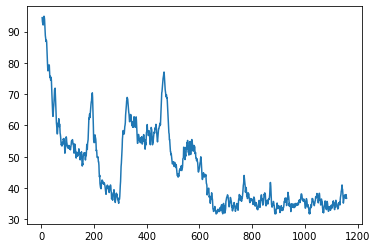

In [31]:
plt.plot(df['episode_len_mean'].rolling(ROLLING_FRAME).mean())

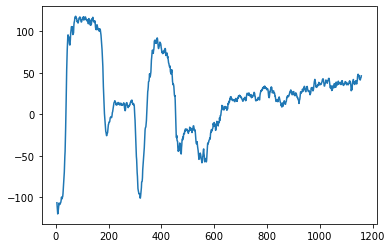

In [32]:
plt.plot(df['episode_reward_mean'].rolling(ROLLING_FRAME).mean())

<AxesSubplot:>

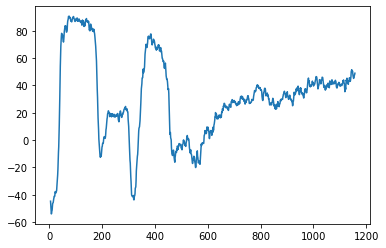

In [33]:
df['policy_reward_mean/innocent'].rolling(ROLLING_FRAME).mean().plot()

<AxesSubplot:>

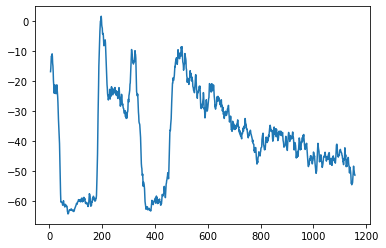

In [34]:
df['policy_reward_mean/traitor'].rolling(ROLLING_FRAME).mean().plot()

<AxesSubplot:>

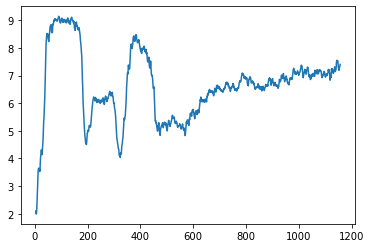

In [35]:
df['custom_metrics/coins_collected_mean'].rolling(ROLLING_FRAME).mean().plot()

<AxesSubplot:>

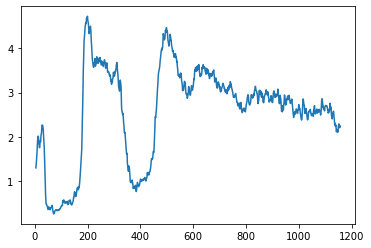

In [36]:
df['custom_metrics/coins_destroyed_mean'].rolling(ROLLING_FRAME).mean().plot()

<AxesSubplot:>

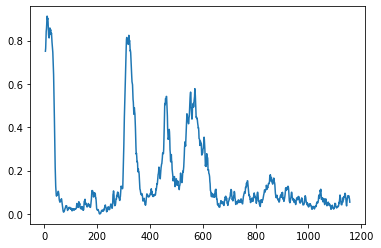

In [37]:
df['custom_metrics/removed_innocents_mean'].rolling(ROLLING_FRAME).mean().plot()

<AxesSubplot:>

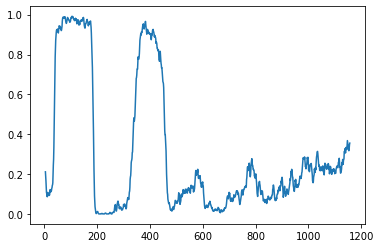

In [38]:
df['custom_metrics/removed_traitors_mean'].rolling(ROLLING_FRAME).mean().plot()

In [39]:
diff = df['custom_metrics/removed_innocents_mean'] / (df['custom_metrics/removed_innocents_mean'] + df['custom_metrics/removed_traitors_mean'] + 0.0001) 

In [40]:
df['custom_metrics/fraction_removed_is_innocent'] = diff

In [41]:
vis_map = [
    [('episode_len_mean', 'Mean Episode Length')], 
    [('custom_metrics/coins_collected_mean', ' Mean Coins Collected'), ('custom_metrics/coins_destroyed_mean', 'Mean Coins Destroyed')],
    [('custom_metrics/removed_innocents_mean', 'Mean Innocents Removed'), ('custom_metrics/removed_traitors_mean', 'Mean Traitors Removed')],
    [('custom_metrics/fraction_removed_is_innocent', 'Removed Agents Innocent Fraction')],
]

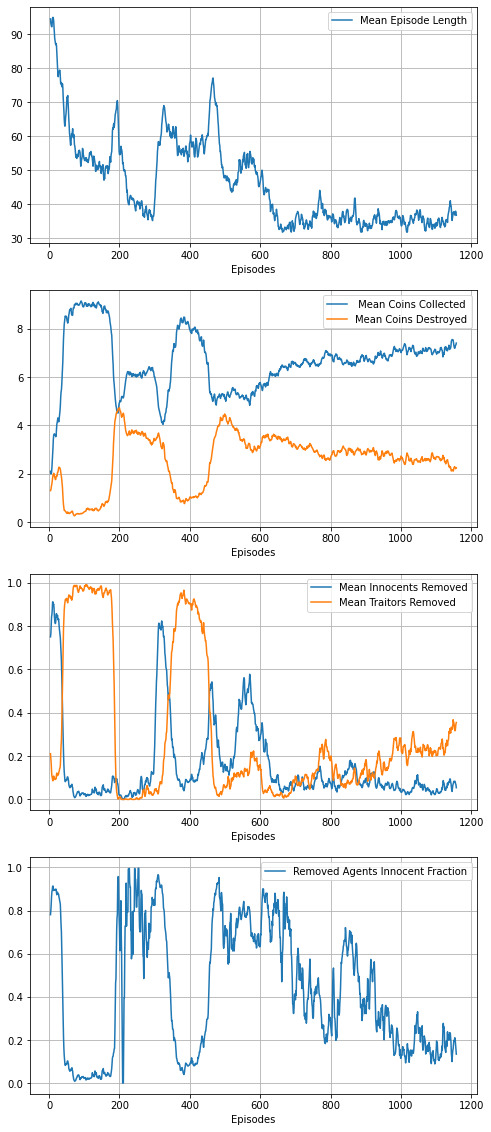

In [42]:
fig, axs = plt.subplots(len(vis_map), 1, figsize=(8, len(vis_map) * 5))

for i, entry in enumerate(vis_map):
    for col, name in entry:
        axs[i].plot(df[col].rolling(ROLLING_FRAME).mean(), label=name)
        #axs[i].set_xlim(left=0)
        #axs[i].set_ylim(bottom=0)
    axs[i].set_xlabel("Episodes")
    axs[i].legend(loc="upper right")
    # axs[i].set_ylabel(vis_map[col])
    axs[i].grid(True)

plt.show()

In [16]:
fig.savefig('vis.png')